In [1]:
! pip install vaderSentiment


In [5]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [6]:
# Load the scraped YouTube comments
input_file = "comments.csv"  # Ensure your comments file exists
df = pd.read_csv(input_file)

# Display the first few rows
df.head()


,Author,Comment,Likes,Published At
0,@SkAlichan,"<a href=""https://www.youtube.com/watch?v=PlgJG...",0,2025-03-01T03:10:32Z
1,@djsagar4653,Download link 🔗 send me bro,0,2025-02-28T21:09:21Z
2,@shrimantbansode1991,🔥🔥🔥🔥🤙🤙,0,2025-02-28T11:35:24Z
3,@kimmeny853,Can someone tell the name of song at 0.05😊,1,2025-02-27T23:28:48Z
4,@bhagvatiyadavyadav1685,"Brother what remix songs 🤙❤ <a href=""https://w...",0,2025-02-26T05:24:11Z


In [7]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [8]:
# Emotion mapping based on VADER score
def map_emotion(score):
    if score >= 0.75:
        return "Ecstatic"
    elif 0.50 <= score < 0.75:
        return "Happy"
    elif 0.05 <= score < 0.50:
        return "Content"
    elif -0.05 <= score < 0.05:
        return "Neutral"
    elif -0.25 <= score < -0.05:
        return "Sad"
    elif -0.50 <= score < -0.25:
        return "Angry"
    elif -0.75 <= score < -0.50:
        return "Frustrated"
    else:
        return "Depressed"

# Function to get sentiment scores
def get_sentiment(comment):
    scores = analyzer.polarity_scores(str(comment))  # Convert to string for safety
    return scores["compound"]  # Compound score represents overall sentiment


In [9]:
# Apply sentiment analysis and map emotions
df["Sentiment_Score"] = df["Comment"].apply(get_sentiment)
df["Emotion"] = df["Sentiment_Score"].apply(map_emotion)


In [10]:
output_file = "sentiment_analysis.csv"
df.to_csv(output_file, index=False)

print(f"Sentiment analysis complete! Results saved in {output_file}")


Sentiment analysis complete! Results saved in sentiment_analysis.csv


In [11]:
! pip install matplotlib seaborn

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Compute the average sentiment score
average_sentiment = df["Sentiment_Score"].mean()

print(f"📊 The average sentiment score is: {average_sentiment:.4f}")

📊 The average sentiment score is: 0.2642


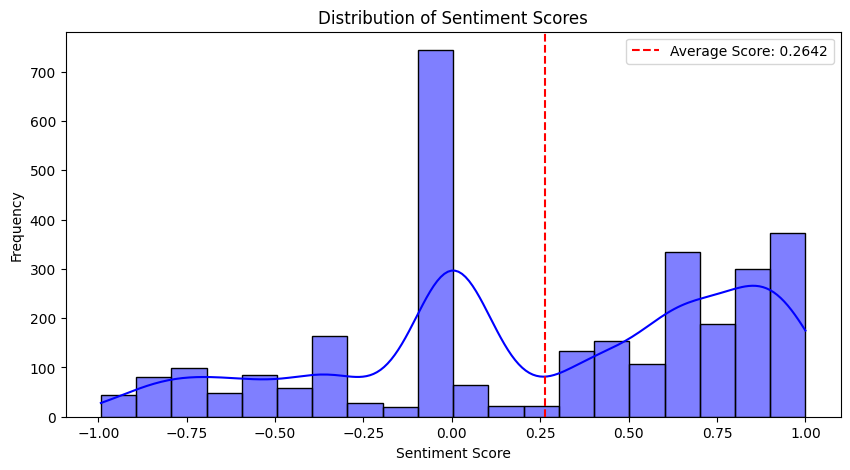

In [14]:
# Plot sentiment score distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Sentiment_Score"], bins=20, kde=True, color='blue')
plt.axvline(average_sentiment, color='red', linestyle='dashed', label=f'Average Score: {average_sentiment:.4f}')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.legend()
plt.show()

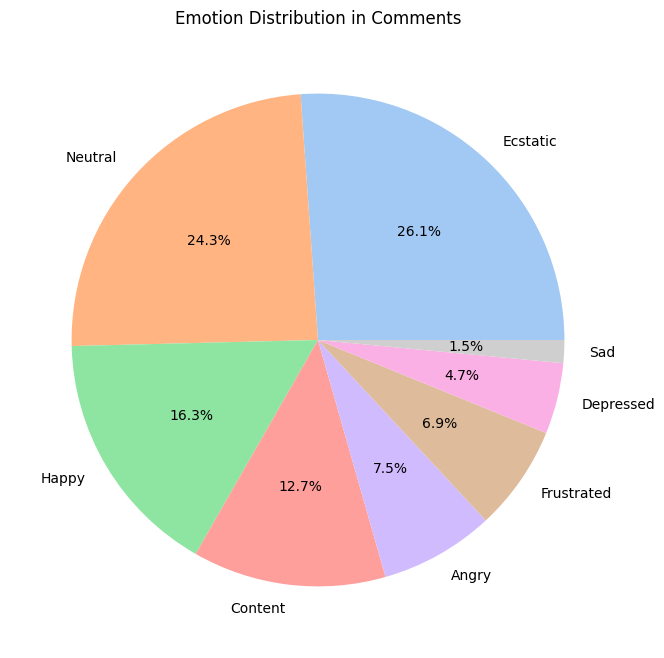

In [15]:
# Count the number of occurrences of each emotion
emotion_counts = df["Emotion"].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Emotion Distribution in Comments")
plt.show()
